# Summarizes results of sequencing run for all 96 samples broken down by species and puts counts into a single file for each species with condition labels. 

In [1]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
location_dict = {'a': "C:\\Users\\heine\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",
                 'c': "C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data", 'd':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
#from core import expression_plots 
#from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colormap as cm
#from matplotlib_venn import venn2
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
#import pickle
#import subprocess
#import networkx as nx
#import scipy.stats as stats
#import statsmodels.graphics.gofplots as stats_graph
#import scipy.cluster.hierarchy as sch

# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#from itertools import product
#this only works if you are online
# online_input = input("are you online? Yes/No")
# if online_input == "Yes": 
#     import plotly.plotly as py
#     import plotly.graph_objs as pygo
#     import plotly.tools as pytools
#     py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
#     #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
# from ete3 import Tree

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherc
base directory is C:\Users\Ben\Documents\GitHub\expression_broad_data
Added C:\Users\Ben\Documents\GitHub\expression_broad_data to path: 
['', 'C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data\\scripts', 'C:\\Users\\Ben\\Anaconda3\\python37.zip', 'C:\\Users\\Ben\\Anaconda3\\DLLs', 'C:\\Users\\Ben\\Anaconda3\\lib', 'C:\\Users\\Ben\\Anaconda3', 'C:\\Users\\Ben\\Anaconda3\\lib\\site-packages', 'C:\\Users\\Ben\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Ben\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Ben\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Ben\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Ben\\.ipython', 'C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data']
I am about to import a library


To Do: 
2) summarize quality
3) build count table

Add in summary stats for
__no_feature	494491
__ambiguous	12855
__too_low_aQual	0
__not_aligned	0
__alignment_not_unique	619135

4) Take a look at an SC and a KL +/- using IGV

Look up parameters for counting program. 


? What about 3'UTRs?  How should I count those? 


In [11]:
#Used this routine once to rename files to have a shorter name because it was too long for windows to process. 
dirlist = os.listdir('C:\\a\\')
for directory in dirlist: 
    print(directory)
    new_directory = directory.split('_')[0]+'_'+directory.split('_')[1][2:]
    print(new_directory)
    os.rename('C:\\a\\' + directory, 'C:\\a\\' + new_directory)

KL_-B50_S50_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-759b3db7-7fb6-4b4a-9d4a-27c8132fa919_output-folder
KL_50
KL_-B51_S51_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-9af2d6a8-3beb-4869-946d-c3210040528e_output-folder
KL_51
KL_-B52_S52_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-13106501-fd63-4f6e-be75-a3898185367a_output-folder
KL_52
KL_-B53_S53_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-14d81bb8-378d-4ede-a9cc-36f530937466_output-folder
KL_53
KL_-B54_S54_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-4c791190-9060-4e73-a19b-b681815261a8_output-folder
KL_54
KL_-B55_S55_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-5fc81768-8559-4e0c-9ada-9c3677369f5d_output-folder
KL_55
KL_-B73_S73_L001_R1_001_fastq_gz-FWD_K_lactis__ASM251v1__Lexogen_QuantSeq_2_2_3-1158af99-1869-4fea-88dd-a7c13df6005d_output-folder
KL_73
KL_-B74_S74_L001_R1_001_fastq_gz-FWD_K_la

SC_-B68_S68_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-8bc14dc1-47b9-418d-bc83-e7e3baa2b226_output-folder
SC_68
SC_-B69_S69_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-19250de0-b660-4303-bdc7-8e06e197b60d_output-folder
SC_69
SC_-B70_S70_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-9c51b558-ab3d-4763-ba58-f9c1be6a6586_output-folder
SC_70
SC_-B71_S71_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-e2273123-4d38-4562-842a-4c87949d7e42_output-folder
SC_71
SC_-B72_S72_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-bb8ee654-e258-4cb1-80d4-c78ccd695de8_output-folder
SC_72
SC_-B76_S76_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-5bef9e65-13e5-4fbc-80a0-6c26073b827a_output-folder
SC_76
SC_-B77_S77_L001_R1_001_fastq_gz-FWD_S_cerevisiae__R64__Lexogen_QuantSeq_2_2_3-f7a65b09-5d04-432b-85b9-28e7314df0b2_output-folder
SC_77
SC_-B78_S78_L001_R1_001_fastq_gz-FWD_S_cerevisia

In [237]:
#extracts data from bluebee processed data files and stores in a new metadata file
#also stores a file for each of species of the gene expression data.  

raw_data_dir = "C:\\Users\\Ben\\Documents\\Data\\RNA_seq\\20181024_KL_SC_PKA_Msn24_Rph1Gis1\\dual_index\\BMH_HES_02\\processed_data\\"
raw_data_dirlist = os.listdir(raw_data_dir)

#Make dataframe to store all metadata: 

I7_index = [int('70' + str(sample_dir.split('_')[1]).zfill(2)) for sample_dir in raw_data_dirlist]

#columns = ['spec', 'index'] + list(starLog.columns[ind_to_keep])
#pd.DataFrame(index = index, columns = columns)
metadata_df = pd.DataFrame(index = I7_index)


countfile_metadata_names = ["__no_feature", "__ambiguous", "__too_low_aQual", "__not_aligned", "__alignment_not_unique"]

#Make dataframe to store all KL count data by gene
#Get KL index
sample_dir = raw_data_dirlist[0]
spec = sample_dir.split('_')[0]
spec_list.append(spec)

index_base = sample_dir.split('_')[1]
index = int('70' + index_base)

#Extract data from read_counts.txt
star_dir = os.path.normpath('star_out\\B' + index_base + '_S' + str(int(index_base)) + '_L001_R1_001.fastq.gz') + os.sep
read_counts = pd.read_table(raw_data_dir + sample_dir + os.sep + star_dir + 'read_counts.txt', header = None, index_col=0)
KL_index = read_counts.drop(labels = countfile_metadata_names,axis=0).index

KL_countdata = pd.DataFrame(index=KL_index)

#Make dataframe to store all SC count data by gene
sample_dir = raw_data_dirlist[-1]
spec = sample_dir.split('_')[0]
spec_list.append(spec)

index_base = sample_dir.split('_')[1]
index = int('70' + index_base)

#Extract data from read_counts.txt
star_dir = os.path.normpath('star_out\\B' + index_base + '_S' + str(int(index_base)) + '_L001_R1_001.fastq.gz') + os.sep
read_counts = pd.read_table(raw_data_dir + sample_dir + os.sep + star_dir + 'read_counts.txt', header = None, index_col=0)
SC_index = read_counts.drop(labels = countfile_metadata_names,axis=0).index

SC_countdata = pd.DataFrame(index=SC_index)

countdata_df_dict = {'KL': KL_countdata, 'SC': SC_countdata}

spec_list = []
starLog_data_out_dict = {}
read_counts_metadata_dict = {}

for sample_dir in raw_data_dirlist: 
    spec = sample_dir.split('_')[0]
    spec_list.append(spec)

    index_base = sample_dir.split('_')[1]
    index = int('70' + index_base)

    #Extract metadata from starLog.final.out
    star_dir = os.path.normpath('star_out\\B' + index_base + '_S' + str(int(index_base)) + '_L001_R1_001.fastq.gz') + os.sep

    starLog = pd.read_table(raw_data_dir + sample_dir + os.sep + star_dir + 'starLog.final.out', index_col = 0, header = None).T

    ind_to_keep = [4,5]+list(range(7,21)) + list(range(22,26))+list(range(27,30))+[31,32]

    starLog_data_out = starLog[starLog.columns[ind_to_keep]]

    starLog_data_out_dict[index] = starLog_data_out.values[0]


    #Extract data from read_counts.txt
    read_counts = pd.read_table(raw_data_dir + sample_dir + os.sep + star_dir + 'read_counts.txt', header = None, index_col=0)
    
    read_counts_metadata_dict[index] = list(read_counts.loc[countfile_metadata_names][1].values) + list(read_counts.drop(labels = countfile_metadata_names,axis=0).sum().values)
    
    #store data in correct dataframe
    countdata_df = countdata_df_dict[spec]
    countdata_df[index] = read_counts.drop(labels = countfile_metadata_names,axis=0)
    
    

#add species to metadata dataframe
metadata_df['spec'] = spec_list

#integrate metadata from starLog
starLog_data_df = pd.DataFrame.from_dict(starLog_data_out_dict, orient='index', columns = starLog_data_out.columns)
metadata_df = metadata_df.merge(starLog_data_df, left_index=True, right_index=True, how = 'inner')

#integrate metadata from count files
read_counts_metadata_df = pd.DataFrame.from_dict(read_counts_metadata_dict, orient = 'index', columns = countfile_metadata_names + ['total_reads_w_features'] )
metadata_df = metadata_df.merge(read_counts_metadata_df, left_index=True, right_index=True, how = 'inner')

#import my pre-sequencing metadata file and merge
metadata_preseq = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_V1.csv'))

metadata_df = metadata_df.merge(metadata_preseq, left_index = True, right_on = 'I7 index', how = 'left')

#convert percentages of mapped reads and number of input reads
metadata_df['Uniquely mapped reads $'] = [float(item.split('%')[0]) for item in metadata_df['                        Uniquely mapped reads % |']]
metadata_df['Number of input reads'] = [int(item) for item in metadata_df['                          Number of input reads |']]

#make columns for pct of reads not aligned to feature
metadata_df['pct not aligned to feature'] = metadata_df['__no_feature'].divide(metadata_df['Number of input reads'])
metadata_df['pct alignment not unique'] = metadata_df['__alignment_not_unique'].divide(metadata_df['Number of input reads'])

metadata_df.to_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_V1_postseq.csv'))

for spec, countdata_df in countdata_df_dict.items():
    countdata_df.to_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\\20181017_countdata_' + spec + '.csv'))


TypeError: 'builtin_function_or_method' object is not iterable

<IPython.core.display.Javascript object>


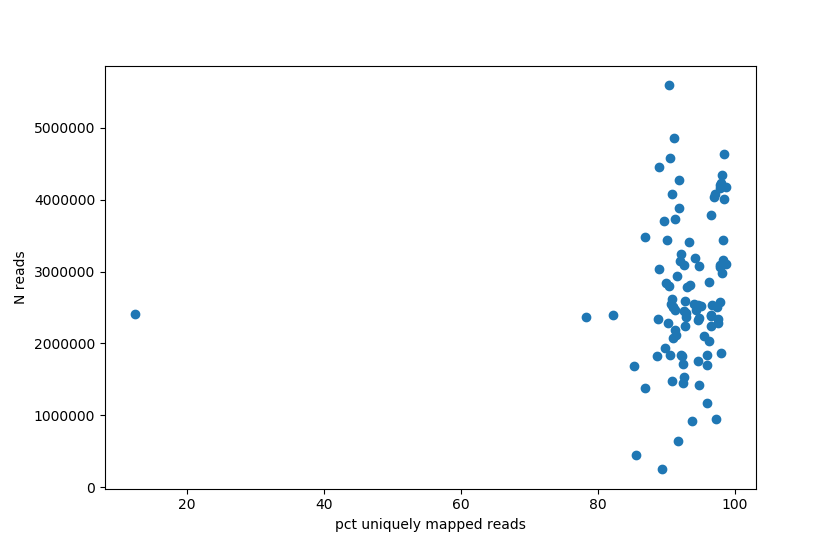

Text(0,0.5,'N reads')

In [157]:
fig, ax = plt.subplots(1,1)

unique_map_pct = [float(item.split('%')[0]) for item in metadata_df['                        Uniquely mapped reads % |'].values]
nreads = [int(item) for item in metadata_df['                          Number of input reads |'].values]
ax.scatter(unique_map_pct, nreads)
ax.set_xlabel('pct uniquely mapped reads')
ax.set_ylabel('N reads')


<IPython.core.display.Javascript object>


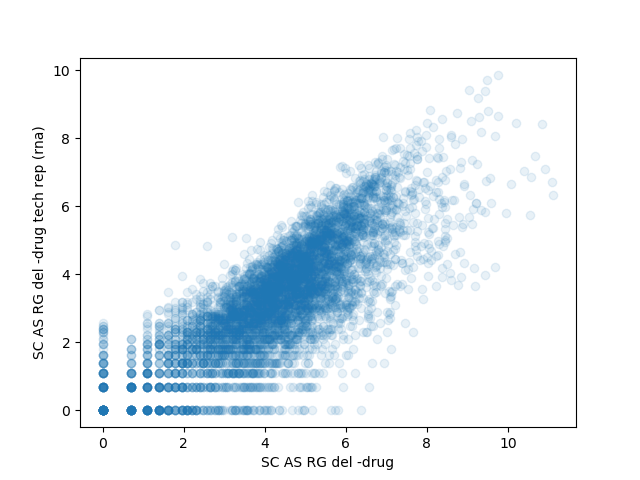

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'SC AS RG del -drug tech rep (rna)')

In [233]:
fig, ax = plt.subplots(1,1)

ax.scatter(np.log(countdata_df_dict['SC'].loc[:,7042]), np.log(countdata_df_dict['SC'].loc[:,7076]), alpha = 0.1)
ax.set_xlabel('SC AS RG del -drug')
ax.set_ylabel('SC AS RG del -drug tech rep (rna)')


<IPython.core.display.Javascript object>


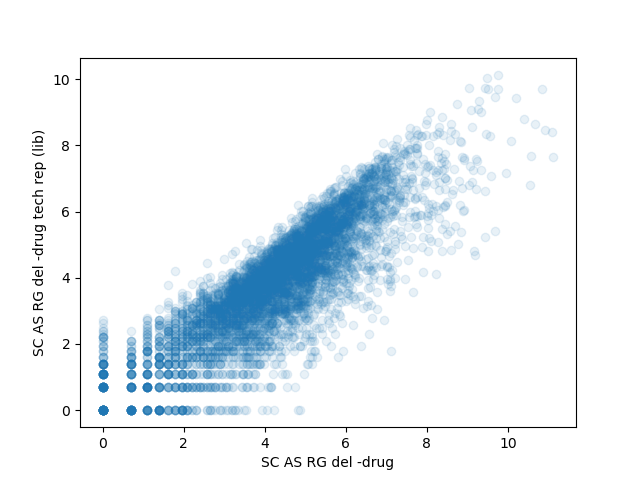

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'SC AS RG del -drug tech rep (lib)')

In [234]:
fig, ax = plt.subplots(1,1)

ax.scatter(np.log(countdata_df_dict['SC'].loc[:,7042]), np.log(countdata_df_dict['SC'].loc[:,7078]), alpha = 0.1)
ax.set_xlabel('SC AS RG del -drug')
ax.set_ylabel('SC AS RG del -drug tech rep (lib)')

<IPython.core.display.Javascript object>


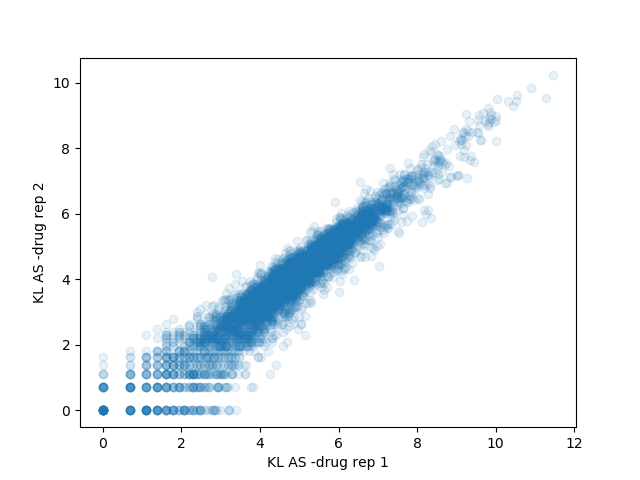

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'KL AS -drug rep 2')

In [236]:
fig, ax = plt.subplots(1,1)

ax.scatter(np.log(countdata_df_dict['KL'].loc[:,7018]), np.log(countdata_df_dict['KL'].loc[:,7080]), alpha = 0.1)
ax.set_xlabel('KL AS -drug rep 1')
ax.set_ylabel('KL AS -drug rep 2')